In [2]:
#read shareholders list from csv
import pandas as pd
df_angels = pd.read_csv('dataframes/shareholders.csv',sep=";")

                                location  counts
0                         District Mu- n       1
1     Handelsregister des Kantons Zurich       1
2                                     LP       5
3                   000/ (haftungsbeschr       1
4                                      1      14
..                                   ...     ...
146                            Wiesbaden       2
147                            Winningen       1
148                            Wuppertal       1
149                               Zossen       1
150                               Zürich       1

[151 rows x 2 columns]


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26612/3514379267.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  germany = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))['name'] == 'Germany']
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_26612/3514379267.py:32: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  germany = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))['name'] == 'Germany']


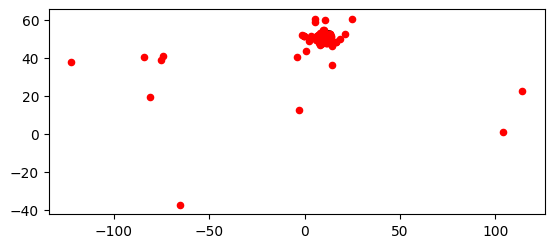

In [3]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Initialize the geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Geocode function to get latitude and longitude
def geocode(city):
    try:
        # Geolocate the center of the city
        loc = geolocator.geocode(city)
        return loc.latitude, loc.longitude
    except:
        return None
    
#create df with number of angels per location
df_angels = df_angels.groupby(['location']).size().reset_index(name='counts')
print(df_angels)
#
# Apply the geocode function to each city in your DataFrame
df_angels['coords'] = df_angels['location'].apply(geocode)

# Drop rows with missing coordinates
df_angels = df_angels.dropna(subset=['coords'])

# Create a GeoDataFrame from your DataFrame
gdf = gpd.GeoDataFrame(df_angels, geometry=gpd.points_from_xy(df_angels['coords'].str[1], df_angels['coords'].str[0]))

# Read the Germany map
germany = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))['name'] == 'Germany']

# Plot the Germany map
ax = germany.plot(color='white', edgecolor='black')

# Plot the locations on the map
gdf.plot(ax=ax, color='red', markersize=20)

plt.show()